In [ ]:
0. Описать задачу словами
+ 1. Прочитать данные
+ 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
+3. Обработать пропущенные значения (или убедиться, что их нет)
+4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
+6. Разбить данные на обучающую и тестовую выборки
+7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
+8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 
+9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
10. По желанию: запустить другие классификаторы. Сравнить результаты
11. По желанию: как-то побороться с несбалансированностью классов (если она есть)
12. По желанию: исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import json

In [2]:
url = "https://raw.githubusercontent.com/Dobrynia100/ML-GameRecommend/main/games.csv"
game_raw = pd.read_csv(url)

In [3]:
url = "https://raw.githubusercontent.com/Dobrynia100/ML-GameRecommend/main/games_metadata.json"
metadata_raw = pd.read_json(url, lines=True)

In [40]:
game_raw.shape

(50796, 13)

In [41]:
metadata_raw.shape

(50796, 3)

In [42]:
game_raw.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [43]:
metadata_raw.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [44]:
game_raw.isna().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [45]:
metadata_raw.isna().sum()

app_id         0
description    0
tags           0
dtype: int64

In [46]:
game_raw[["positive_ratio", "user_reviews", "price_final", "discount"]].describe(percentiles=[.1, .25, .5, .75, .9]).round(2).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
positive_ratio,50796.0,77.05,18.26,0.0,51.0,67.00,81.00,91.00,96.00,100.00
user_reviews,50796.0,1826.49,40103.43,10.0,12.0,19.00,48.00,206.00,1089.00,7494460.00
price_final,50796.0,8.60,11.50,0.0,0.0,0.99,4.99,10.99,19.99,299.99
discount,50796.0,5.60,18.62,0.0,0.0,0.00,0.00,0.00,0.00,90.00


In [47]:
game_raw['positive_ratio'].mode()

0    100
Name: positive_ratio, dtype: int64

In [48]:
game_raw['user_reviews'].mode()

0    10
Name: user_reviews, dtype: int64

In [49]:
game_raw['positive_ratio'].mean()

77.0512048192771

In [50]:
game_raw['user_reviews'].mean()

1826.4934640522877

In [51]:
game_raw.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

In [52]:
game_raw['rating'].dtype

dtype('O')

In [4]:
game_raw['rating']=game_raw['rating'].astype('category')


In [5]:
game_raw['rating'].dtype

CategoricalDtype(categories=['Mixed', 'Mostly Negative', 'Mostly Positive', 'Negative',
                  'Overwhelmingly Negative', 'Overwhelmingly Positive',
                  'Positive', 'Very Negative', 'Very Positive'],
, ordered=False)

In [6]:
Building_dummies = pd.get_dummies(game_raw['rating'])

In [82]:
Building_dummies.head()

,Mixed,Mostly Negative,Mostly Positive,Negative,Overwhelmingly Negative,Overwhelmingly Positive,Positive,Very Negative,Very Positive
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
50791,1,0,0,0,0,0,0,0,0
50792,1,0,0,0,0,0,0,0,0
50793,0,0,0,0,0,0,0,0,1
50794,0,1,0,0,0,0,0,0,0


In [81]:
game_raw['rating']

0          Very Positive
1               Positive
2          Very Positive
3                  Mixed
4          Very Positive
              ...       
50791              Mixed
50792              Mixed
50793      Very Positive
50794    Mostly Negative
50795      Very Positive
Name: rating, Length: 50796, dtype: category
Categories (9, object): ['Mixed', 'Mostly Negative', 'Mostly Positive', 'Negative', ..., 'Overwhelmingly Positive', 'Positive', 'Very Negative', 'Very Positive']

In [8]:
#место для нормализации?

In [9]:
#game_raw.drop(['rating', 'title','app_id','date_release','steam_deck','win','mac','linux'], axis=1)
#game_stand = (game_raw - game_raw.mean(axis = 0))/game_raw.std(axis = 0) 

In [52]:
X=game_raw.drop(['rating', 'title','app_id','date_release'], axis=1)
y = game_raw['rating']

In [53]:
X

,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,True,False,False,84,2199,9.99,9.99,0.0,True
1,True,False,False,85,21,2.99,2.99,0.0,True
2,True,True,True,92,3722,14.99,14.99,0.0,True
3,True,False,False,61,873,14.99,14.99,0.0,True
4,True,True,False,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...
50791,True,False,False,55,4473,70.00,0.00,0.0,True
50792,True,False,False,65,351,50.00,0.00,0.0,True
50793,True,False,False,96,101,22.00,0.00,0.0,True
50794,True,False,False,38,29458,40.00,0.00,0.0,True


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(38097, 12699)

In [223]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [224]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [225]:
err_test

0.08835341365461848

In [226]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test, y_test_predict)
print(CM)

[[2796    2  119    0    0    2    1    0   85]
 [  76  403    0    0    0    0    0    0    4]
 [  78    0 1823    0    0    7   11    0  284]
 [   1   11    0   76    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    1    0    0   26    0    0  260]
 [   0    0    8    0    0    0 3377    0    7]
 [   0   10    0    0    0    0    0    5    0]
 [   2    0   90    0    0   42   19    0 3071]]


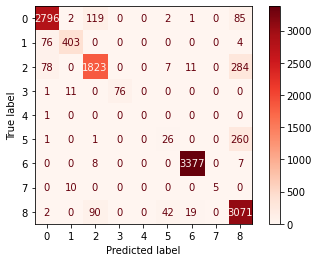

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(CM).plot(cmap='Reds')
pass

In [31]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0848887046772081 1


In [32]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.08788093550673282


In [36]:
1-knn.score(X_train, y_train)

0.0

In [ ]:
#логистическая регрессия

In [11]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic_model =LogisticRegression(solver='newton-cg', max_iter=1000)
logistic_model.fit(X, y)

G:\Program Files\conda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
G:\Program Files\conda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
G:\Program Files\conda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=1000, solver='newton-cg')

In [16]:
err_train = np.mean(y != logistic_model.predict(X))
err_test = np.mean(y_test != logistic_model.predict(X_test))
print(err_train, err_test)

0.054748405386250885 0.05464997243877471


In [24]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test, logistic_model.predict(X_test))
print(CM)

[[3001    0    4    0    0    0    0    0    0]
 [  20  462    0    1    0    0    0    0    0]
 [   0    0 2134    0    0    0   67    0    2]
 [   0    9    0   79    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0   17    0    0  271]
 [   0    0   18    0    0    0 3309    0   65]
 [   0    7    0    3    0    0    0    5    0]
 [   0    0  136    0    0    6   84    0 2998]]


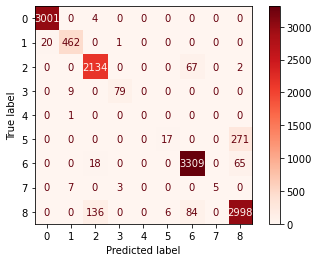

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(CM).plot(cmap='Reds')
pass

In [26]:
print(logistic_model.coef_) # Коэффициенты разделяющей гиперплоскости
print(logistic_model.intercept_)

[[-9.63066999e-01 -3.51182854e-01  4.31920218e-02 -3.49972687e-01
   2.32505570e-02 -2.20754868e-02  1.46116594e-02 -1.10742791e-03
   7.22715944e+00]
 [ 5.04534900e+00 -3.50342177e-01  6.86174037e-02 -8.09381398e-01
   2.31983685e-02 -2.35645383e-02  1.83158947e-02 -2.95944220e-03
   1.00200978e+01]
 [-6.84550741e+00 -3.80414762e-01  8.81320527e-02  3.10320858e-01
   2.32516549e-02 -2.39810888e-02  1.12960410e-02 -5.99388541e-04
  -1.25018054e+00]
 [ 1.09279060e+01  2.15952562e-01 -2.99323233e-01 -1.33475733e+00
  -3.45667111e-02  1.58302192e-03 -2.02989166e-03  4.81516742e-04
   1.09259460e+01]
 [ 8.89817287e+00  8.13936542e-01  1.22076532e+00 -6.59097041e-01
   2.32549485e-02  7.27995924e-02 -5.04610454e-02  3.77641465e-02
   8.89806004e+00]
 [-8.50871964e+00  6.98479639e-02  1.47781293e-01  1.48397157e+00
   2.32636306e-02  2.18862629e-02 -1.82388588e-02 -1.40828449e-03
  -1.83094866e+01]
 [-9.11516182e+00 -2.17624913e-01  1.06236148e-01  1.34478822e+00
  -1.29409758e-01 -1.0978307

In [31]:
#Random Forest

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Building_dummies, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(38097, 12699)

In [28]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators = 300,max_depth=4, random_state=0,criterion='squared_error')
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, n_estimators=300, random_state=0)

In [29]:
MSE_train = np.mean((rf_model.predict(X_train) - y_train)**2)
MSE_test  = np.mean((rf_model.predict(X_test ) - y_test )**2)
print(MSE_train, MSE_test)

Mixed                      0.000000
Mostly Negative            0.000000
Mostly Positive            0.000000
Negative                   0.001199
Overwhelmingly Negative    0.000325
Overwhelmingly Positive    0.000004
Positive                   0.000000
Very Negative              0.000987
Very Positive              0.000004
dtype: float64 Mixed                      0.000000
Mostly Negative            0.000000
Mostly Positive            0.000000
Negative                   0.001092
Overwhelmingly Negative    0.000090
Overwhelmingly Positive    0.000000
Positive                   0.000000
Very Negative              0.001014
Very Positive              0.000000
dtype: float64


G:\Program Files\conda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
G:\Program Files\conda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [30]:
err_train = np.mean(y_train != rf_model.predict(X_train))
err_test = np.mean(y_test != rf_model.predict(X_test))
print(err_train, err_test)

Mixed                      0.000000
Mostly Negative            0.000000
Mostly Positive            0.000000
Negative                   0.007166
Overwhelmingly Negative    0.007166
Overwhelmingly Positive    0.000131
Positive                   0.000000
Very Negative              0.007166
Very Positive              0.000131
dtype: float64 Mixed                      0.00000
Mostly Negative            0.00000
Mostly Positive            0.00000
Negative                   0.00819
Overwhelmingly Negative    0.00819
Overwhelmingly Positive    0.00000
Positive                   0.00000
Very Negative              0.00819
Very Positive              0.00000
dtype: float64


G:\Program Files\conda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
G:\Program Files\conda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [31]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

positive_ratio    0.636555
user_reviews      0.363445
win               0.000000
mac               0.000000
linux             0.000000
price_final       0.000000
price_original    0.000000
discount          0.000000
steam_deck        0.000000
dtype: float64

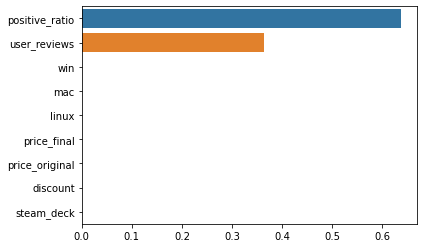

In [32]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

In [33]:
#confusion matrix не имеет смысла,задача регрессии

In [83]:
#MLP Полносвязная нейронная сеть

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42)

In [57]:
%%time
mlp_model.fit(X_train, y_train)


CPU times: total: 13.4 s
Wall time: 6.85 s


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=42)

In [58]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [ ]:
#ошибка на обучающей

In [59]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.07486153765388351 0.077880148043153


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9251384623461165

In [61]:
#подбор гипер параметров

In [62]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

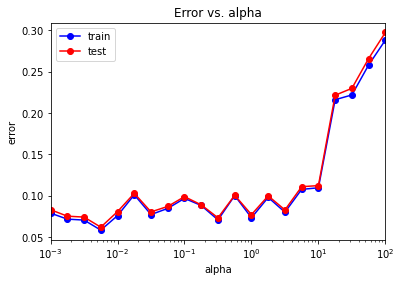

In [63]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

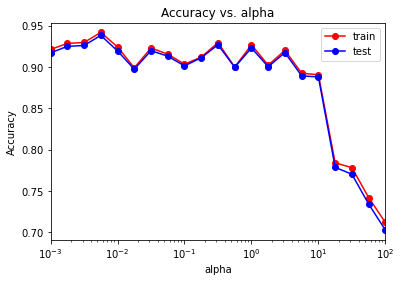

In [64]:

plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [65]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.05816730976192351 0.06173714465705961


In [71]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00562341]


In [72]:
alpha_opt = alpha_opt[0]

In [73]:
#новое alpha

In [76]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'adam', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
#ошибки
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.05816730976192351
0.06173714465705961


In [77]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test, y_test_pred)
print(CM)

[[2951    0   47    0    0    0    1    0    6]
 [  33  450    0    0    0    0    0    0    0]
 [  34    0 1856    0    0    0    8    0  305]
 [   0    4    0   84    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  288]
 [   0    0    9    0    0    0 3375    0    8]
 [   0    1    0    0    0    0    0   14    0]
 [   1    0   19    0    0    0   19    0 3185]]


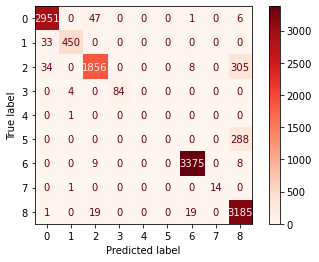

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(CM).plot(cmap='Reds')
pass

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

                         precision    recall  f1-score   support

                  Mixed       0.98      0.98      0.98      3005
        Mostly Negative       0.99      0.93      0.96       483
        Mostly Positive       0.96      0.84      0.90      2203
               Negative       1.00      0.95      0.98        88
Overwhelmingly Negative       0.00      0.00      0.00         1
Overwhelmingly Positive       0.00      0.00      0.00       288
               Positive       0.99      0.99      0.99      3392
          Very Negative       1.00      0.93      0.97        15
          Very Positive       0.84      0.99      0.91      3224

               accuracy                           0.94     12699
              macro avg       0.75      0.74      0.74     12699
           weighted avg       0.92      0.94      0.93     12699



G:\Program Files\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Program Files\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Program Files\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#выводы

In [80]:
#логическая регрессия и MLP после подбора гиперпараметра справились примерно одинакого
#возможно переобучение,
#по графикам не было замечено разницы между на train и test
#Random Forrest аномально показал слишком низкую ошибку